## Machine Learning Record Mining

Project to create a pipeline that uses GeoDeepDive's output to find Unaquired Sites for Neotoma.

Using NLP parsed text and a Data Science approach, identify whether a paper is suitable for Neotoma and detect features such as 'Site Name', 'Location', 'Age Span' and 'Site Descriptions'.

In [1]:
# Loading libraries
import pandas as pd

# Options for DF display
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 100)

## Loading and viewing the Data

### Loading NLP Sentences

In [2]:
import src.modules.preprocessing.nlp_sentence_loader as sentence_loader
import src.modules.preprocessing.bibliography_loader as bib_loader
import src.modules.preprocessing.add_regex_degrees as ard

In [3]:
nlp_sentences = sentence_loader.preprocessed_sentences_sql()

Data obtained from PostgreSQL


In [4]:
nlp_sentences.head(3)

,_gddid,sentid,wordidx,words,part_of_speech,special_class,lemmas,word_type,word_modified,words_as_string,dms_regex,dd_regex,digits_regex,words_l
0,54b43266e138239d8684efed,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]","[Available, online, at, www.sciencedirect.com, Quaternary, Research, 69, -LRB-, 2008, -RRB-, 263, --, 275, www.elsevier.com/locate/yqres, Development, of, the, mixed, conifer, forest, in, northern, New, Mexico, and, its, relationship, to, Holocene, environmental, change, R., Scott, Anderson, a, ,, b, ,, ,, Renata, B., Jass, b, ,1, ,, Jaime, L., Toney, b, ,2, ,, Craig, D., Allen, c, ,, Luz, M., Cisneros-Dozal, d, ,, Marcey, Hess, d, ,, Jeff, Heikoop, d, ,, Julianna, Fessenden, d, a, Center, f...","[JJ, NN, IN, NNP, NNP, NNP, CD, -LRB-, CD, -RRB-, CD, :, CD, NNS, NN, IN, DT, JJ, NN, NN, IN, JJ, NNP, NNP, CC, PRP$, NN, TO, NNP, JJ, NN, NNP, NNP, NNP, DT, ,, NN, ,, ,, NNP, NNP, NNP, NN, CD, ,, NNP, NNP, NNP, NN, CD, ,, NNP, NNP, NNP, NN, ,, NNP, NNP, NNP, NN, ,, NNP, NNP, NN, ,, NNP, NNP, NN, ,, NNP, NNP, NN, DT, NNP, IN, NNP, NNPS, CC, NNP, ,, NNP, CD, ,, NNP, NNP, NNP, ,, NNP, ,, NNP, CD, ,, NNP, NN, NNP, NNP, NNP, CC, NNP, NNP, ...]","[O, O, O, O, O, O, NUMBER, O, DATE, O, NUMBER, O, NUMBER, O, O, O, O, O, O, O, O, O, LOCATION, LOCATION, O, O, O, O, O, O, O, PERSON, PERSON, PERSON, O, O, O, O, O, PERSON, PERSON, PERSON, O, NUMBER, O, PERSON, PERSON, PERSON, O, NUMBER, O, PERSON, PERSON, PERSON, O, O, PERSON, PERSON, PERSON, O, O, PERSON, PERSON, O, O, PERSON, PERSON, O, O, PERSON, PERSON, O, O, ORGANIZATION, ORGANIZATION, ORGANIZATION, ORGANIZATION, ORGANIZATION, ORGANIZATION, O, O, NUMBER, O, ORGANIZATION, ORGANIZATION, ...","[available, online, at, www.sciencedirect.com, Quaternary, Research, 69, -lrb-, 2008, -rrb-, 263, --, 275, www.elsevier.com/locate/yqres, development, of, the, mixed, conifer, forest, in, northern, New, Mexico, and, its, relationship, to, Holocene, environmental, change, R., Scott, Anderson, a, ,, b, ,, ,, Renata, B., Jass, b, ,1, ,, Jaime, L., Toney, b, ,2, ,, Craig, D., Allen, c, ,, Luz, M., Cisneros-Dozal, d, ,, Marcey, Hess, d, ,, Jeff, Heikoop, d, ,, Julianna, Fessenden, d, a, Center, f...","[dep, dep, dep, dep, dep, dep, dep, , dep, , dep, , dep, dep, dep, dep, dep, dep, dep, dep, dep, dep, dep, dep, cc, dep, dep, dep, dep, dep, dep, dep, dep, dep, dep, , dep, , , dep, dep, dep, dep, dep, , dep, dep, dep, dep, dep, , dep, dep, dep, dep, , dep, dep, dep, dep, , dep, dep, dep, , dep, dep, dep, , dep, dep, dep, dep, dep, dep, dep, dep, cc, dep, , dep, dep, , dep, dep, dep, , dep, , dep, dep, , dep, dep, dep, dep, dep, cc, dep, dep, ...]","[218, 218, 218, 218, 218, 218, 218, 0, 218, 0, 218, 0, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 0, 218, 0, 0, 218, 218, 218, 218, 218, 0, 218, 218, 218, 218, 218, 0, 218, 218, 218, 218, 0, 218, 218, 218, 218, 0, 218, 218, 218, 0, 218, 218, 218, 0, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 0, 218, 218, 0, 218, 218, 218, 0, 218, 0, 218, 218, 0, 218, 218, 218, 218, 218, 218, 218, 218, ...]","Available,online,at,www.sciencedirect.com,Quaternary,Research,69,-LRB-,2008,-RRB-,263,--,275,www.elsevier.com/locate/yqres,Development,of,the,mixed,conifer,forest,in,northern,New,Mexico,and,its,relationship,to,Holocene,environmental,change,R.,Scott,Anderson,a,,,b,,,,,Renata,B.,Jass,b,,1,,,Jaime,L.,Toney,b,,2,,,Craig,D.,Allen,c,,,Luz,M.,Cisneros-Dozal,d,,,Marcey,Hess,d,,,Jeff,Heikoop,d,,,Julianna,Fessenden,d,a,Center,for,Environmental,Sciences,&,Education,,,Box,5694,,,Northern,Arizona,Univers...",[],[],"[69, 2008, 263, 275, 1, 2, 5694, 8601

In [5]:
# Running this takes forever. Do not run unless necessary
# nlp_sentences.describe(include = 'all')

In [6]:
avg_sentences = nlp_sentences.groupby('_gddid')['_gddid','sentid'].transform('max')
avg_sentences.drop_duplicates(subset='_gddid', keep='first', inplace=True)
avg_sentences.describe()

,sentid
count,218.000000
mean,513.600917
std,232.460891
min,2.000000
25%,397.250000
50%,504.000000
75%,638.250000
max,1330.000000


From the Summary Statistics, despite having 111,965 sentences, there are only 218 unique articles (`_gddid`). The article with most sentences, had 1330 sentences; that's the max number found in `sentid`.  
In order to know the average of sentences, I grouped by `_gddid` and then, obtained the number of sentences per article. After that, I just got the mean through a Summary of statistics to know that on average, each article has 514 sentences.

### Loading Bibliography Data

In [7]:
bibliography = bib_loader.preprocessed_bibliography()

In [8]:
bibliography.head(3)

,_type,doi,publisher,title,journal.name.name,author,year,number,volumne,_gddid,type,pages,link_url,link_type
0,doi,10.1016/S0277-3791(99)00007-4,Elsevier,"Palaeoclimate, chronology and vegetation history of the Weichselian Lateglacial: comparative analysis of data from three cores at Lago Grande di Monticchio, southern Italy",Quaternary Science Reviews,"Huntley, B.; Watts, W.A.; Allen, J.R.M.; Zolitschka, B.",1999,7,NaN,550453fde1382326932d85f7,article,945--960,http://www.sciencedirect.com/science/article/pii/S0277379199000074,publisher
1,doi,10.1139/b92-002,Canadian Science Publishing,"Holocene history of forest trees on the Bruce Peninsula, southern Ontario",Canadian Journal of Botany,"Bennett, K. D.",1992,1,NaN,578b5aabcf58f1587003efba,article,6--18,http://www.nrcresearchpress.com/doi/abs/10.1139/b92-002,publisher
2,doi,10.1016/0031-0182(80)90043-7,Elsevier,Glacial sequence and environmental history in the Sierra Nevada del cocuy (Colombia),"Palaeogeography, Palaeoclimatology, Palaeoecology","Van Der Hammen, T.; Barelds, J.; De Jong, H.; De Veer, A.A.",1980,NaN,NaN,54b43244e138239d868493cd,article,247--340,http://www.sciencedirect.com/science/article/pii/0031018280900437,publisher


In [9]:
bibliography.describe(include = 'all')

,_type,doi,publisher,title,journal.name.name,author,year,number,volumne,_gddid,type,pages,link_url,link_type
count,221,221,221,221,221,221,221,183,0,221,221,216,221,220
unique,1,221,6,221,41,213,47,28,0,221,1,214,221,1
top,doi,10.1111/j.1502-3885.2009.00090.x,Elsevier,"Wisconsin Environment of Interior Alaska: Pollen and Macrofossil Analysis of a 27 Meter Core from the Isabella Basin (Fairbanks, Alaska)",Quaternary Research,"Markgraf, Vera",2011,3,NaN,56f8f62ccf58f1710ac939e0,article,1--13,http://www.sciencedirect.com/science/article/pii/S0012821X15007840,publisher
freq,221,1,138,1,44,3,14,40,NaN,1,221,2,1,220


## EDA

Reviewing our data includes skimming through some papers online and seeing if the data is consistent with our NLP Sentences dataframe.

From there, we can also visualize what we would like our model to predict: 'Location', 'Site Name', 'Age Span', and 'Site Description' from a "Human perspective".

### Finding Latitude and Longitud via REGEX 

After reviewing some PDF's and viewing the data parsing, I noticed some possible patterns for coordinates.

<img src="figures/img/00_snippet_of_pdf.png" alt="Drawing" style="width: 300px;"/>

Which translates to our pandas dataframe as:

![alt text](figures/img/01_snippet_in_sql.png "PandasVersion")

As a first problem, we can notice that the degrees symbol `°` was translated as a `3`. On some other occassions, it is confused as an `o` or a middle point `◦`. For `'`, this symbol got confused by the word `cents`.

I am still going to use normal REGEX to find coordinates in the most intuitive way. 

A coordinate for longitude is a number ranging from -180° to 180°. It has three components, `°, ',"` and it covers the position in E or W.

Latitude goes from -90° to 90°, has the same three components and goes from S to N.

Using REGEX, and assuming data consistency, the following code should be able to extract coordinates. 

In [10]:
# TODO Find REGEX of couples of numbers (123, 234)
nlp_sentences[['words_as_string', 'words', 'dms_regex', 'dd_regex']].head(3)

,words_as_string,words,dms_regex,dd_regex
0,"Available,online,at,www.sciencedirect.com,Quaternary,Research,69,-LRB-,2008,-RRB-,263,--,275,www.elsevier.com/locate/yqres,Development,of,the,mixed,conifer,forest,in,northern,New,Mexico,and,its,relationship,to,Holocene,environmental,change,R.,Scott,Anderson,a,,,b,,,,,Renata,B.,Jass,b,,1,,,Jaime,L.,Toney,b,,2,,,Craig,D.,Allen,c,,,Luz,M.,Cisneros-Dozal,d,,,Marcey,Hess,d,,,Jeff,Heikoop,d,,,Julianna,Fessenden,d,a,Center,for,Environmental,Sciences,&,Education,,,Box,5694,,,Northern,Arizona,Univers...","[Available, online, at, www.sciencedirect.com, Quaternary, Research, 69, -LRB-, 2008, -RRB-, 263, --, 275, www.elsevier.com/locate/yqres, Development, of, the, mixed, conifer, forest, in, northern, New, Mexico, and, its, relationship, to, Holocene, environmental, change, R., Scott, Anderson, a, ,, b, ,, ,, Renata, B., Jass, b, ,1, ,, Jaime, L., Toney, b, ,2, ,, Craig, D., Allen, c, ,, Luz, M., Cisneros-Dozal, d, ,, Marcey, Hess, d, ,, Jeff, Heikoop, d, ,, Julianna, Fessenden, d, a, Center, f...",[],[]
1,"The,Chihuahueños,Bog,record,extends,to,over,15,000,cal,yr,BP,.","[The, Chihuahueños, Bog, record, extends, to, over, 15,000, cal, yr, BP, .]",[],[]
2,"An,Artemisia,steppe,,,then,an,open,Picea,woodland,grew,around,a,small,pond,until,ca.,11,700,cal,yr,BP,when,Pinus,ponderosa,became,established,.","[An, Artemisia, steppe, ,, then, an, open, Picea, woodland, grew, around, a, small, pond, until, ca., 11,700, cal, yr, BP, when, Pinus, ponderosa, became, established, .]",[],[]


In [11]:
# Run only when enough time available
# nlp_sentences[['words_as_string', 'words', 'dms_regex', 'dd_regex']].describe()

The `dms_regex` only returned 95 unique values. That's to say that from the 111965 sentences, only 95 possess something similar to the regex we are looking for.  However, the `dd_regex` returned 8 values.

Let's see an example of each regex extraction to verify values.

In [12]:
# dms regex example
dms_example = nlp_sentences[nlp_sentences['_gddid'] == '550453fde1382326932d85f7']
dms_example = dms_example[dms_example['sentid'] == 10]
dms_example[['words', 'words_as_string', 'dms_regex', 'dd_regex']]

,words,words_as_string,dms_regex,dd_regex
94875,"[Introduction, Laghi, di, Monticchio, are, two, maar, lakes, located, in, the, explosion, crater, that, lies, west, of, the, peak, of, Monte, Vulture, ,, near, Mel, '', in, the, Basilicata, region, of, southern, Italy, -LRB-, 403, 56, 40, N, ,, 153, 36, 48, E, -RRB-, -LRB-, Fig., 1, -RRB-, .]","Introduction,Laghi,di,Monticchio,are,two,maar,lakes,located,in,the,explosion,crater,that,lies,west,of,the,peak,of,Monte,Vulture,,,near,Mel,'',in,the,Basilicata,region,of,southern,Italy,-LRB-,403,56,40,N,,,153,36,48,E,-RRB-,-LRB-,Fig.,1,-RRB-,.","[403,56,40,N,,,153,36,48,E]",[]


In [13]:
# dd_regex example
dd_example = nlp_sentences[nlp_sentences['_gddid'] == '57a12aaccf58f1b0962a836c']
dd_example = dd_example[dd_example['sentid'] == 62]
dd_example[['words', 'words_as_string', 'dms_regex', 'dd_regex']]

,words,words_as_string,dms_regex,dd_regex
62439,"[Kingston, meadow, Kingston, Meadow, -LRB-, 24...","Kingston,meadow,Kingston,Meadow,-LRB-,2400,m,e...",[],"[117.11,W,39.21,N]"


### Problems with the REGEX approach

As seen before, extracting information using REGEX is very complicated. We would require a lot of queries that would retrieve each particular case.

A possible alternative could be using NER, Named Entity Recognition.

Article 01  
Skimmed info: 
 * `Article Name:` Palaeoclimate_chronology_and_vegetation_history_of_the_Weichselian_Lateglacial
 * `Link`: http://www.sciencedirect.com/science/article/pii/S0277379199000074  
 * `Site Name`:  Laghi di Monticchio
 * `Location`:  40° 56' 40" N, 15° 36' 48" E
 * `Age Span`: 
 * `Site Descriptions`: The record from Lago Grande di Monticchio now adds macrofossil evidence of the presence of relatively boreal tree taxa during the Lateglacial interstadial and provides a chronology based upon annually laminated sediments.

In [14]:
# Article 01 
ard.order_article(nlp_sentences, '550453fde1382326932d85f7')

,sentid,words
94865,1,"[Quaternary, Science, Reviews, 18, -LRB-, 1999..."
94866,2,"[Plant, macrofossil, data, from, one, core, pr..."
94867,3,"[Quantitative, palaeoclimate, reconstructions,..."
94868,4,"[The, chronological, framework, for, Lateglaci..."
94870,5,"[Surface, conditions, in, the, North, Atlantic..."
...,...,...
95325,448,"[Vegetation, history, and, climate, of, the, l..."
95326,449,"[Quaternary, Science, Reviews, ,, 15, ,, 133, ..."
95327,450,"[Zolitschka, ,, B., ,, &, Negendank, ,, J., F...."
95329,451,"[Sedimentology, ,, dating, and, palaeoclimatic..."


Article 02  
Skimmed info:  
* `Article:` Development of the Mixed Connifer Forest in Northern New Mexico and its relationship to Holocene environmental change
* `Link`: http://www.sciencedirect.com/science/article/pii/S0033589407001512
* `Site Name`:  Chihuahuenos Bog 
* `Location`:  ??? No Given Coordinates 
* `Age Span`:   
* `Site Descriptions`:  Chihuahueños Bog is located within the mixed conifer forest and has affinities to the flora of the southern Rocky Mountains(Foxx and Tierney, 1985; Allen, 2004). Although the area immediately surrounding the bog has been heavily logged in recent years, nearly every conifer species growing in montaneforests of the Jemez mountains is represented either along theshore of the bog or in the surrounding uplands.  

In [15]:
# Article 2
# ard.order_article(nlp_sentences, '54b43266e138239d8684efed')

Article 03  
Skimmed info:  
* `Link`: http://dx.doi.org/10.1130/g35541.1  # No Full access to article
* `Site Name`:  Cahokia region, Illinois, USA
* `Location`:  N38°42'00" - N38°42'00", W90°04'60" - W90°04'60" - Not found on text (yet).
* `Age Span`:   
* `Site Descriptions`: Record from Horseshoe Lake, an oxbow lake in the central Mississippi River valley that is adjacent to the Cahokia site (Illinois, USA), the largest prehistoric settlement north of Mexico.   

In [16]:
# Article 3
# ard.order_article(nlp_sentences, '57c5b941cf58f1338eaddb5b')

Article 04  
Skimmed info:  
* `Link:`http://www.tandfonline.com/doi/abs/10.1080/00173130902965157
* `Site Name`:  Begbunar
* `Location`:  42°09′ N, 22° 33′ E; 1750 ; in SQL file shows as: `42,°,09,cents,N,,,22,°,33,cents,E`
* `Age Span`:   
* `Site Descriptions`: Located in the central treeless zone of the Osogovo mountains, which are situated at the border between south-western Bulgaria and the north-eastern former Yugoslav Republic of Macedonia.

In [17]:
# Article 4
# ard.order_article(nlp_sentences, '58d29193cf58f14928755ba5')

In [18]:
# Try to see the exact location. Wont show last few words.
# pd.DataFrame(ard.order_article(nlp_sentences,'58d29193cf58f14928755ba5').iloc[4]['words'])

Article 05  
Skimmed info:  
* `Link`: http://dx.doi.org/10.1130/0016-7606(1997)109<1306:tfalqp>2.3.co
* `Site Name`:  Cottonwood III, Cottonwood IV, Red Lady, Red Well, Splains
* `Location`:  38°49'50' 106°24'45', 38°49'50' 106°24'45', 38°52'50' 107°2'30', 38°52'50' 107°2'30',38°53'40' 107°3'15', 38°52'28' 107°05', 38°50' 107°4'30', 38°50' 107°4'30', 38°52' 107°2'30', 38°45' 106°50', 38°45' 106°50'
* `Age Span`:   17000 - 400
* `Site Descriptions`:   The lower timberline or lower forest border is the lower elevational limit of a continuous forest belt. In the Rocky Mountains it forms a sharp contrast with shrublands or grasslands in valley bottoms. Trees may extend below the lower timberline in favorable habitats, along streams or on rocky outcrops.  

In [19]:
# Article 5
# ard.order_article(nlp_sentences, '57928e07cf58f133d1c26609')

In [20]:
# Print the exact line where locations are.
# pd.DataFrame(ard.order_article(nlp_sentences, '57928e07cf58f133d1c26609').iloc[179])

## Linking Neotoma DB to extract locations

In [21]:
import src.modules.preprocessing.neotoma_loader as nl

In [22]:
neotoma = nl.neotoma_loader()

In [23]:
neotoma.head(3)

,siteid,sitename,longitudeeast,latitudenorth,longitudewest,latitudesouth,sitedescription,doi
0,10330,Lac du Sommet,-70.66468,47.71662,-70.66573,47.71382,"The small shallow Lac du Sommet (0.02 km2, 4 m...",10.1177/0959683611400199
1,10330,Lac du Sommet,-70.66468,47.71662,-70.66573,47.71382,"The small shallow Lac du Sommet (0.02 km2, 4 m...",10.1177/0959683611400199
2,1729,Myrtle Lake,-93.37853,47.98645,-93.39207,47.97876,Lake surrounded by peatland. Physiography: Red...,10.1139/b68-190


In [24]:
nlp_bib = nlp_sentences.merge(bibliography, on = '_gddid')
nlp_bib.head(3)

,_gddid,sentid,wordidx,words,part_of_speech,special_class,lemmas,word_type,word_modified,words_as_string,...,title,journal.name.name,author,year,number,volumne,type,pages,link_url,link_type
0,54b43266e138239d8684efed,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Available, online, at, www.sciencedirect.com,...","[JJ, NN, IN, NNP, NNP, NNP, CD, -LRB-, CD, -RR...","[O, O, O, O, O, O, NUMBER, O, DATE, O, NUMBER,...","[available, online, at, www.sciencedirect.com,...","[dep, dep, dep, dep, dep, dep, dep, , dep, , d...","[218, 218, 218, 218, 218, 218, 218, 0, 218, 0,...","Available,online,at,www.sciencedirect.com,Quat...",...,Development of the mixed conifer forest in nor...,Quaternary Research,"Anderson, R. Scott; Jass, Renata B.; Toney, Ja...",2008,2,NaN,article,263--275,http://www.sciencedirect.com/science/article/p...,publisher
1,54b43266e138239d8684efed,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[The, Chihuahueños, Bog, record, extends, to, ...","[DT, NNP, NN, NN, VBZ, TO, IN, CD, JJ, NN, NN, .]","[O, O, O, O, O, O, O, NUMBER, O, DURATION, O, O]","[the, Chihuahueños, bog, record, extend, to, o...","[det, compound, compound, nsubj, , case, amod,...","[4, 4, 4, 5, 0, 11, 11, 11, 11, 11, 5, 0]","The,Chihuahueños,Bog,record,extends,to,over,15...",...,Development of the mixed conifer forest in nor...,Quaternary Research,"Anderson, R. Scott; Jass, Renata B.; Toney, Ja...",2008,2,NaN,article,263--275,http://www.sciencedirect.com/science/article/p...,publisher
2,54b43266e138239d8684efed,3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[An, Artemisia, steppe, ,, then, an, open, Pic...","[DT, NNP, NN, ,, RB, DT, JJ, NNP, NN, VBD, IN,...","[O, O, O, O, O, O, O, LOCATION, LOCATION, O, O...","[a, Artemisia, steppe, ,, then, a, open, Picea...","[det, compound, nsubj, , advmod, det, amod, co...","[3, 3, 10, 0, 9, 9, 9, 9, 10, 0, 14, 14, 14, 1...","An,Artemisia,steppe,,,then,an,open,Picea,woodl...",...,Development of the mixed conifer forest in nor...,Quaternary Research,"Anderson, R. Scott; Jass, Renata B.; Toney, Ja...",2008,2,NaN,article,263--275,http://www.sciencedirect.com/science/article/p...,publisher


In [25]:
#print(nlp_bib.shape)

In [26]:
nlp_bib[['words_as_string', 'journal.name.name', 'dms_regex', 'dd_regex']].head(3)

,words_as_string,journal.name.name,dms_regex,dd_regex
0,"Available,online,at,www.sciencedirect.com,Quat...",Quaternary Research,[],[]
1,"The,Chihuahueños,Bog,record,extends,to,over,15...",Quaternary Research,[],[]
2,"An,Artemisia,steppe,,,then,an,open,Picea,woodl...",Quaternary Research,[],[]


In [27]:
neotoma_joined_df = nl.grouped_coords_df(neotoma)

In [28]:
neotoma_joined_df.head(2)

,doi,sitenames,siteid,longeast,latnorth,sitenames_l
0,0.1139/e80-122,"[East Baltic Bog, Mermaid Bog, Portage Bog]","[763, 1684, 1903]","[64, 63, 62]",[46],"[portage, east, mermaid, baltic, bog]"
1,10.1002/(SICI)1099-1417(199607/08)11:4<327::AI...,[Lundin Tower],[3256],[2],[56],"[lundin, tower]"


From Neotoma DB, we have obtained a dataframe grouped by DOI that lists each `sitename`, `siteid`, `longitude east`, and `latitunde north`. Now, let's join this information to the NLP_Bib dataframe. For now, let's do to the one that coordinates have been obtained with REGEX just to see if some of the numbers and sitenames make sense. 

In [29]:
nlp_bib_neotoma = nlp_bib.merge(neotoma_joined_df, on = 'doi', how = 'left')
print(nlp_bib_neotoma.shape)

(111965, 32)


In [30]:
import src.modules.eda_creator.intersection_files_creator as fc
#Output path for generated files
path = r'/Users/seiryu8808/Desktop/UWinsc/Github/UnacquiredSites/src/output'

In [31]:
articles_not_in_neotoma = fc.not_in_neotoma(df = nlp_bib_neotoma, df2 = bibliography, path = path)

A TSV file was created on your output folder.


In [32]:
articles_not_in_neotoma.describe()

,_gddid,title,year,doi,link_url
count,14,14,14,14,14
unique,14,14,12,14,14
top,54b43268e138239d8684f74a,Tar Trap: No Evidence of Domestic Dog Burial w...,1987,10.1130/0016-7606(1997)109<1306:tfalqp>2.3.co;2,http://www.sciencedirect.com/science/article/p...
freq,1,1,2,1,1


We can see there are 14 articles that we do not have reference for in Neotoma DB.

For these 14 articles, we have no coordinates to compare to.

In [33]:
neotoma[neotoma['doi']=='10.1016/S0031-0182(01)00322-4']

,siteid,sitename,longitudeeast,latitudenorth,longitudewest,latitudesouth,sitedescription,doi


In [34]:
# Drop rows with na
nlp_bib_neotoma = nlp_bib.merge(neotoma_joined_df, on = 'doi')
print(nlp_bib_neotoma.shape)

(106640, 32)


In [35]:
# Filter df to see which units have REGEX longer than one
mask = ((nlp_bib_neotoma['dms_regex'].str.len() > 0) | (nlp_bib_neotoma['dd_regex'].str.len() > 0))
nlp_bib_neotoma_regex = nlp_bib_neotoma.loc[mask]
print(nlp_bib_neotoma_regex.shape)

nlp_bib_neotoma_regex = nlp_bib_neotoma_regex[['_gddid', 'sentid', 'doi', 'words', 'words_as_string', 'dms_regex', 'dd_regex', 'sitenames', 'latnorth', 'longeast']].reset_index()
nlp_bib_neotoma_regex.head(2)

(100, 32)


,index,_gddid,sentid,doi,words,words_as_string,dms_regex,dd_regex,sitenames,latnorth,longeast
0,3314,578a1f6ecf58f1b54b810cd9,94,10.1139/b85-070,"[Lake, Hope, Simpson, -LRB-, 52, ', 27, ', N, ...","Lake,Hope,Simpson,-LRB-,52,',27,',N,,,56,',26,...","[52,',27,',N,,,56,',26,',W]",[],"[Lake Hope Simpson, 18 [Moraine Lake]]",[52],"[56, 58]"
1,3318,578a1f6ecf58f1b54b810cd9,97,10.1139/b85-070,"[The, lake, basin, itself, has, an, irregular,...","The,lake,basin,itself,has,an,irregular,though,...","[52,',33,',N,,,56,',54,',W]",[],"[Lake Hope Simpson, 18 [Moraine Lake]]",[52],"[56, 58]"


We can see that most of the REGEX indeed pulled out the same locations for latitude and longitudes as in the Neotoma database.

In [36]:
nlp_bib_neotoma[['_gddid', 'sentid', 'doi', 'words', 'dms_regex', 'sitenames', 'latnorth', 'longeast']].head(2)

,_gddid,sentid,doi,words,dms_regex,sitenames,latnorth,longeast
0,54b43266e138239d8684efed,1,10.1016/j.yqres.2007.12.002,"[Available, online, at, www.sciencedirect.com,...",[],"[Chihuahueños Bog, Chihuahueños Bog]",[36],[106]
1,54b43266e138239d8684efed,2,10.1016/j.yqres.2007.12.002,"[The, Chihuahueños, Bog, record, extends, to, ...",[],"[Chihuahueños Bog, Chihuahueños Bog]",[36],[106]


In [37]:
print(nlp_bib_neotoma.shape)

(106640, 32)


In [38]:
nlp_bib_neotoma = ard.find_intersections(nlp_bib_neotoma, cols_to_intersect = ['digits_regex','longeast'], new_col_name = 'intersection_words_long')
nlp_bib_neotoma = ard.find_intersections(nlp_bib_neotoma, cols_to_intersect = ['digits_regex','latnorth'], new_col_name = 'intersection_words_lat')

long_lat_int = nlp_bib_neotoma[(nlp_bib_neotoma['intersection_words_lat'].apply(len) != 0) & (nlp_bib_neotoma['intersection_words_long'].apply(len) != 0 )]

print(long_lat_int.shape)
print(nlp_bib_neotoma.shape)
# long_lat_int.describe(include = 'all')

(230, 34)
(106640, 34)


In [39]:
sentences_with_intersections_df = fc.sentences_w_coords_int(long_lat_int, path = path)

A TSV file was created on your output folder.


In [40]:
sentences_with_intersections_df.describe(include = 'all')

,_gddid,words,year,expected_lat,intersection_lat,expected_long,intersection_long,dms_regex,dd_regex
count,230,230,230,230,230,230,230,230,230
unique,122,230,38,69,75,81,96,22,5
top,550719f6e1382326932d9425,"[Alfred, Bog, -LRB-, 45, ◦, 29, N, ;, 74, ◦, 4...",2013,[41],[41],[71],[71],[],[]
freq,9,1,30,19,22,17,20,206,226


In [41]:
# Article wo coordinates intersections DF
no_intersections_df = fc.articles_wo_coords(nlp_bib_neotoma, bibliography, neotoma_joined_df, path = path)

A TSV file was created on your output folder.


In [42]:
no_intersections_df.describe(include='all')

,_gddid,title,year,intersection_words_lat,expected_lat,intersection_words_long,expected_long,doi,link_url
count,11,11,11,11,11,11,11,11,11
unique,11,11,10,1,9,1,10,11,11
top,58333faecf58f177a7b78a4b,Long-term drivers of change in Polylepis woodl...,1978,[],[46],[],[80],10.1139/e98-095,http://www.sciencedirect.com/science/article/p...
freq,1,1,2,11,3,11,2,1,1


## Intersections Between Sitenames and NLP Sentences
Let's now extract Sitenames from the Neotoma database. For this, I will group by doi and then, list all sitenames that are mentioned in each doi.

In [43]:
nlp_bib_neotoma[['words_l', 'sitenames_l']]                                                           

,words_l,sitenames_l
0,"[available, online, at, www.sciencedirect.com,...","[chihuahueños, bog]"
1,"[the, chihuahueños, bog, record, extends, to, ...","[chihuahueños, bog]"
2,"[an, artemisia, steppe, ,, then, an, open, pic...","[chihuahueños, bog]"
3,"[c/n, ratios, ,, δ13c, and, δ15n, values, indi...","[chihuahueños, bog]"
4,"[higher, percentages, of, aquatic, algae, and,...","[chihuahueños, bog]"
...,...,...
106635,"[ann, .]","[begbunar, peat-bog]"
106636,"[sofia, univ., .]","[begbunar, peat-bog]"
106637,"[fac, .]","[begbunar, peat-bog]"
106638,"[geol, .]","[begbunar, peat-bog]"


In [44]:
sitenames_intersection = fc.sentences_w_site_int(nlp_bib_neotoma, path = path)
sitenames_intersection.head(2)

A TSV file was created on your output folder.


,_gddid,sentid,words_l,expected_sitename,intersected_sitename,year
0,54b43266e138239d8684efed,1,"[available, online, at, www.sciencedirect.com,...","[chihuahueños, bog]","[chihuahueños, bog]",2008
1,54b43266e138239d8684efed,2,"[the, chihuahueños, bog, record, extends, to, ...","[chihuahueños, bog]","[chihuahueños, bog]",2008


In [45]:
#sitenames_intersection.describe(include = 'all')

For sitenames, 197 out of 204 articles have an identified sitename. 
Let's get a TSV for the files that do not have a sitename.

In [46]:
articles_wo_sitename_intersection = fc.articles_wo_sites(nlp_bib_neotoma, bibliography, neotoma_joined_df, path = path)

A TSV file was created on your output folder.


In [47]:
articles_wo_sitename_intersection.head(3)

,_gddid,title,year,intersection_words_sitenames,exptected_sitename,doi,link_url
0,54b43249e138239d86849f76,Biomass burning in Indonesia and Papua New Gui...,2001,[],[Ijomba],10.1016/S0031-0182(01)00248-6,http://www.sciencedirect.com/science/article/p...
1,5504dfbce1382326932d89ef,Sedimentary evidence of landscape and climate ...,2010,[],"[Labský důl, Labský důl]",10.1016/j.quascirev.2009.12.008,http://www.sciencedirect.com/science/article/p...
2,55059631e1382326932d8dcf,Moving front or population expansion: How did ...,2005,[],"[Klotjärnen, Klotjärnen, Holtjärnen]",10.1016/j.quascirev.2005.03.002,http://www.sciencedirect.com/science/article/p...


## Simple Modeling for Latitude and Longitude Coordinates

In [80]:
# Loading libraries for modeling
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Options
pd.options.mode.chained_assignment = None

import time

In [66]:
data = nlp_bib_neotoma[['_gddid', 'sentid', 'words', 'words_as_string', 'dms_regex', 'dd_regex', 'latnorth', 'longeast', 'intersection_words_lat', 'intersection_words_long']]

In [68]:
data['has_both_lat_long_int'] = ((data['intersection_words_lat'].apply(len) != 0) & (data['intersection_words_long'].apply(len) != 0 ))

# Map True to One and False to Zero
data['has_both_lat_long_int'] = data['has_both_lat_long_int'].astype(int)

In [69]:
# Reduce data to columns of interest
data = data[['words_as_string', 'has_both_lat_long_int']]

In [72]:
# Define corpus for CountVectorizer
corpus = data['words_as_string'].tolist()

# Split data into training and testing sets
data_train, data_test = train_test_split(data, test_size = 0.20, random_state = 12)

In [73]:
# Translate words to vectors
# This model can add stopwords, punctuation, etc.
# For now, use all words.
vec = CountVectorizer(min_df=2, 
                      tokenizer=nltk.word_tokenize)

# Fit and transform training
X_train = vec.fit_transform(data_train['words_as_string']) 
y_train = data_train['has_both_lat_long_int']

# Transform test data without fitting
X_test = vec.transform(df_test['words_as_string']) 
y_test = df_test['bool']

Now we are going to analize different classification models and see the different results.

In [84]:
classifiers = {
    'knn'           : KNeighborsClassifier(),
    'decision tree' : DecisionTreeClassifier(random_state = 0, max_depth = 15),
    'random forest' : RandomForestClassifier(n_estimators = 10),
    'SVM'           : SVC(C = 100, gamma = "scale"),
    'logistic reg'  : LogisticRegression(solver="lbfgs", max_iter = 10000),
    'linear reg'    : LinearRegression(),
    'sklearn NN'    : MLPClassifier() 
}

In [91]:
train_scores = dict()
test_scores = dict()
training_times = dict()

for classifier_name, classifier_obj in classifiers.items():
    print("Fitting", classifier_name)
    t = time.time()
    classifier_obj.fit(X_train, y_train)
    
    training_times[classifier_name] = time.time() - t
    train_scores[classifier_name] = classifier_obj.score(X_train, y_train)
    test_scores[classifier_name] = classifier_obj.score(X_test, y_test)

Fitting knn
Fitting decision tree
Fitting random forest
Fitting SVM
Fitting logistic reg
Fitting linear reg
Fitting sklearn NN


/Users/seiryu8808/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [93]:
pd.options.display.float_format = '{:,.2f}'.format

data = {"train acc": train_scores, "valid acc" : test_scores, "training time (s)" : training_times}
df = pd.DataFrame(data, columns = data.keys())
df.index = list(classifiers.keys())
df

,train acc,valid acc,training time (s)
knn,1.00,1.00,0.02
decision tree,1.00,1.00,0.74
random forest,1.00,1.00,0.73
SVM,1.00,1.00,57.15
logistic reg,1.00,1.00,10.53
linear reg,0.89,-0.86,126.90
sklearn NN,1.00,1.00,811.74


We can see there is something really off from the previous data.

Let's try to figure out what could be causing all this noise.

#### Visualizing some possible important features

Using a DecisionTree classifier to see which are the features that are giving more importance.

In [58]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = 100)
clf.fit(X_train, y_train)

Train error rate:  0.0
Test error rate:  0.002063015753938524


In [59]:
# See which features are considered important
f_imp = clf.feature_importances_

In [60]:
feature_importance = 100.0 * (f_imp / f_imp.max())
feature_names = vec.get_feature_names()

In [61]:
# A holder for feature_name: feature_importance
feats = {} 
for feature, importance in zip(feature_names, feature_importance):
    feats[feature] = importance #add the name/value pair

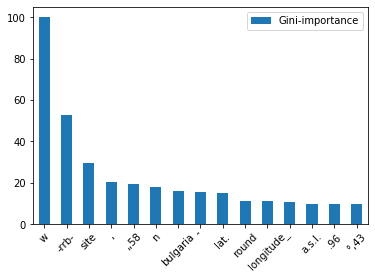

In [62]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)[:15].plot(kind='bar', rot=45)